In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#root_dir = '/content/gdrive/MyDrive/Data'

root_dir = '../../../Data'

Mounted at /content/gdrive


In [2]:
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from pandas.core.frame import DataFrame
from time import sleep


Downsampling preprocessing's dataset

In [ ]:
data_loading_dir = os.path.join(root_dir, "18 participants/AX3/Preprocessed")
experience = 8
data_saving_dir = os.path.join(root_dir, "18 participants/AX3/DownsampledDataset"+str(experience))

div = 300
portion = int(3000 / div)
sections = []
for i in range(0, 3000, portion):
  sections.append(i)
sections.append(3000)
print(sections)

def downsample(dataset):
  newDataset = pd.DataFrame()
  newDataset["Label"] = dataset["Label"]
  for i in range(div):
    newDataset["X" + str(i)] = dataset["X"].apply(lambda x : np.mean(np.array(x[sections[i]:sections[i+1]])))
    newDataset["Y" + str(i)] = dataset["Y"].apply(lambda x : np.mean(np.array(x[sections[i]:sections[i+1]])))
    newDataset["Z" + str(i)] = dataset["Z"].apply(lambda x : np.mean(np.array(x[sections[i]:sections[i+1]])))
  newDataset["Temp"] = dataset["Temp"].apply(lambda x : np.mean(np.array(x)))
  newDataset["Activity"] = dataset["Activity"]
  dataset = None
  sleep(60)
  return newDataset

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [ ]:
participants = 1

if not os.path.exists(data_saving_dir):
  os.mkdir(data_saving_dir)

for participant in range(1, participants+1):
  file_name = os.path.join(data_loading_dir, "AX3_step1_sub" + str(participant) + ".pkl")
  save_name = os.path.join(data_saving_dir, "Dataset_participant" + str(participant) + ".pkl")
  dataset = pd.read_pickle(file_name)
  newDataset = downsample(dataset)
  newDataset.to_pickle(save_name)
  dataset = None
  sleep(60)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, u

Data transformation

In [3]:
experience = 8
data_loading_dir = os.path.join(root_dir, "18 participants/AX3/DownsampledDataset" + str(experience))
file_name = os.path.join(data_loading_dir, "Dataset_participant1.pkl")
participants = 1
orig_dataset = pd.read_pickle(file_name)

for participant in range(2, participants + 1):
  file_name = os.path.join(data_loading_dir, "Dataset_participant" + str(participant) + ".pkl")
  new_dataset = pd.read_pickle(file_name)
  orig_dataset = orig_dataset.append(new_dataset, ignore_index=True)

data_saving_dir = os.path.join(root_dir, "18 participants/AX3/TransformedData" + str(experience))
if not os.path.exists(data_saving_dir):
  os.mkdir(data_saving_dir)

save_file = os.path.join(data_saving_dir, "Raw.pkl")
orig_dataset.to_pickle(save_file)

In [4]:
from scipy.fft import fft

def perm(orig_dataset):
  dataset = orig_dataset.drop(['Label'], axis=1)
  columns = np.array(dataset.columns)
  randIdx = random.sample(range(0, len(columns)),len(columns))
  new_columns = []
  for i in range(len(columns)):
    new_columns.append(columns[randIdx[i]])
  dataset.columns = (new_columns)
  for i in range(len(columns)):
    column = new_columns[i]
    dataset[column] = orig_dataset[column]
  return dataset

def noise(orig_dataset):
  dataset = orig_dataset.drop(['Label'], axis=1)
  stds = np.array(orig_dataset.std())
  columns = dataset.columns
  for i in range(len(columns)):
    std_val = stds[i] 
    column = columns[i]
    mean = dataset[column].mean()
    res = np.array(np.random.normal(mean, std_val, (orig_dataset.shape[0],)))
    dataset['std'] = res
    dataset[column] = dataset[column] + dataset['std']
  dataset = dataset.drop(['std'], axis=1)
  return dataset

def FFT(orig_dataset):
  dataset = orig_dataset.drop(['Label'], axis=1)
  columns = dataset.columns
  for i in range(len(columns)):
    column = columns[i]
    dataset[column] = fft(np.array(dataset[column]))
  return dataset

def scale(orig_dataset):
  dataset = orig_dataset.drop(['Label'], axis=1)
  columns = dataset.columns
  for column in columns:
    dataset.loc[:, column] *= 1.5
  return dataset

def negation(orig_dataset):
  dataset = orig_dataset.drop(['Label'], axis=1)
  columns = dataset.columns
  for column in columns:
    dataset.loc[:, column] *= -1
  return dataset

def negation_plus_noise(orig_dataset):
  negated_dataset = negation(orig_dataset)
  noised_dataset = noise(orig_dataset)
  dataset = orig_dataset.drop(['Label'], axis=1)
  columns = dataset.columns
  for column in columns:
    dataset[column] = negated_dataset[column] + noised_dataset[column]
  return dataset


In [5]:
experience = 8
numberOfClasses = 7
data_loading_dir = os.path.join(root_dir, "18 participants/AX3/TransformedData" + str(experience))
load_file = os.path.join(data_loading_dir, "Raw.pkl")
orig_dataset = pd.read_pickle(load_file)

permuted_dataset = perm(orig_dataset)
noised_dataset = noise(orig_dataset)
fft_dataset = FFT(orig_dataset)
scaled_dataset = scale(orig_dataset)
negated_dataset = negation(orig_dataset)
negation_plus_noise_dataset = negation_plus_noise(orig_dataset)
raw_dataset = orig_dataset.drop(['Label'], axis=1)

def SaveFile(dataset, file_name):
  save_file = os.path.join(data_loading_dir, file_name + ".pkl")
  dataset.to_pickle(save_file)

def getLabel(label, length):
  data = {}
  for i in range(len(label)):
    data[i] = np.full(length,label[i])
  dataset = DataFrame(data)
  return dataset

def countNans(dataset):
  counts = 0
  columns = dataset.columns
  for i in range(len(columns)):
    column = columns[i]
    counts = counts + dataset[column].isnull().sum()
  return counts

def getLabelsDataset(numberOfClasses, length):
  label = np.zeros(numberOfClasses)
  label[0] = 1
  dataset = getLabel(label, length)
  for i in range(1, numberOfClasses):
    label = np.zeros(numberOfClasses)
    label[i] = 1
    new_dataset = getLabel(label, length)
    dataset = dataset.append(new_dataset, ignore_index=True)
    new_dataset = None
  return dataset

def windowDataset(dataset, window_size):
  new_dataset = []
  for i in range(0,dataset.shape[0], window_size):
    value = dataset[i]
    for j in range(i+1, i+window_size):
      value = np.append(value, dataset[j], axis=0)
    new_dataset.append(value)
  return np.array(new_dataset)

def windowLabels(dataset, window_size):
  new_labels = []
  for i in range(0, labels.shape[0], window_size):
    new_labels.append(labels[i])
  return np.array(new_labels)

def get_train_test_splits(dataset, spare_label, numberOfClasses):
  label = np.zeros(numberOfClasses)
  label[spare_label] = 1
  labels = getLabel(label, dataset.shape[0])
  dataset = np.array(dataset)
  n = dataset.shape[0]
  train_ratio = 0.9
  separate_id = int(n * train_ratio)

  x_train = dataset[:separate_id]
  y_train = labels[:separate_id]

  x_test = dataset[separate_id:]
  y_test = labels[separate_id:]
  return x_train, y_train, x_test, y_test  

SaveFile(permuted_dataset, "Permuted")
SaveFile(noised_dataset, "Noised")
SaveFile(fft_dataset, "FFT")
SaveFile(scaled_dataset, "Scaled")
SaveFile(negated_dataset, "Negated")
SaveFile(negation_plus_noise_dataset, "Negated_Plus_Noise")

#merged_dataset = None
#merged_dataset = pd.concat([merged_dataset, raw_dataset])
#merged_dataset = pd.concat([merged_dataset, permuted_dataset])
#merged_dataset = pd.concat([merged_dataset, noised_dataset])
#merged_dataset = pd.concat([merged_dataset, fft_dataset])
#merged_dataset = pd.concat([merged_dataset, scaled_dataset])
#merged_dataset = pd.concat([merged_dataset, negated_dataset])
#merged_dataset = pd.concat([merged_dataset, negation_plus_noise_dataset])
#merged_dataset = merged_dataset.reset_index()
#SaveFile(merged_dataset, "Merged")
#print(merged_dataset.shape)

labels = getLabelsDataset(numberOfClasses, permuted_dataset.shape[0])
SaveFile(labels, "Labels")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [6]:
experience = 8
numberOfClasses = 7
data_loading_dir = os.path.join(root_dir, "18 participants/AX3/TransformedData" + str(experience))
load_file = os.path.join(data_loading_dir, "Merged.pkl")
#dataset = np.array(pd.read_pickle(load_file))
#dataset = pd.read_pickle(load_file).drop('index', axis=1)
#dataset = np.array(dataset)

#print(countNans(raw_dataset))
#print(countNans(permuted_dataset))
#print(countNans(noised_dataset))
#print(countNans(fft_dataset))

#dataset = np.array(raw_dataset)
#dataset = np.append(dataset, np.array(permuted_dataset), axis=0)
#dataset = np.append(dataset, np.array(noised_dataset), axis=0)
#dataset = np.append(dataset, np.array(fft_dataset), axis=0)

x_train, y_train, x_test, y_test = get_train_test_splits(raw_dataset, 0, numberOfClasses)
new_x_train, new_y_train, new_x_test, new_y_test = get_train_test_splits(permuted_dataset, 1, numberOfClasses)
x_train = np.append(x_train, new_x_train, axis=0)
y_train = np.append(y_train, new_y_train, axis=0)
x_test = np.append(x_test, new_x_test, axis=0)
y_test = np.append(y_test, new_y_test, axis=0)

new_x_train, new_y_train, new_x_test, new_y_test = get_train_test_splits(noised_dataset, 2, numberOfClasses)
x_train = np.append(x_train, new_x_train, axis=0)
y_train = np.append(y_train, new_y_train, axis=0)
x_test = np.append(x_test, new_x_test, axis=0)
y_test = np.append(y_test, new_y_test, axis=0)

new_x_train, new_y_train, new_x_test, new_y_test = get_train_test_splits(fft_dataset, 3, numberOfClasses)
x_train = np.append(x_train, new_x_train, axis=0)
y_train = np.append(y_train, new_y_train, axis=0)
x_test = np.append(x_test, new_x_test, axis=0)
y_test = np.append(y_test, new_y_test, axis=0)

new_x_train, new_y_train, new_x_test, new_y_test = get_train_test_splits(scaled_dataset, 4, numberOfClasses)
x_train = np.append(x_train, new_x_train, axis=0)
y_train = np.append(y_train, new_y_train, axis=0)
x_test = np.append(x_test, new_x_test, axis=0)
y_test = np.append(y_test, new_y_test, axis=0)

new_x_train, new_y_train, new_x_test, new_y_test = get_train_test_splits(negated_dataset, 5, numberOfClasses)
x_train = np.append(x_train, new_x_train, axis=0)
y_train = np.append(y_train, new_y_train, axis=0)
x_test = np.append(x_test, new_x_test, axis=0)
y_test = np.append(y_test, new_y_test, axis=0)

new_x_train, new_y_train, new_x_test, new_y_test = get_train_test_splits(negation_plus_noise_dataset, 6, numberOfClasses)
x_train = np.append(x_train, new_x_train, axis=0)
y_train = np.append(y_train, new_y_train, axis=0)
x_test = np.append(x_test, new_x_test, axis=0)
y_test = np.append(y_test, new_y_test, axis=0)


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1, 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1, 1))

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(186606, 902, 1, 1)
(186606, 7)
(20734, 902, 1, 1)
(20734, 7)


Epoch 1/25
1458/1458 [==============================] - 97s 66ms/step - loss: 0.9343 - accuracy: 0.6057 - val_loss: 0.5719 - val_accuracy: 0.7305
Epoch 2/25
1458/1458 [==============================] - 97s 66ms/step - loss: 11.0048 - accuracy: 0.7883 - val_loss: 0.3073 - val_accuracy: 0.8569
Epoch 3/25
1458/1458 [==============================] - 95s 65ms/step - loss: 12.9342 - accuracy: 0.9121 - val_loss: 0.3156 - val_accuracy: 0.9459
Epoch 4/25
1458/1458 [==============================] - 97s 66ms/step - loss: 14.3871 - accuracy: 0.9870 - val_loss: 0.0801 - val_accuracy: 0.9970
Epoch 5/25
1458/1458 [==============================] - 96s 66ms/step - loss: 13.8701 - accuracy: 0.9917 - val_loss: 0.0117 - val_accuracy: 0.9995
Epoch 6/25
1458/1458 [==============================] - 96s 66ms/step - loss: 16.1213 - accuracy: 0.9943 - val_loss: 1.7296 - val_accuracy: 0.9976
Epoch 7/25
1458/1458 [==============================] - 97s 66ms/step - loss: 13.5004 - accuracy: 0.9946 - val_loss: 0.

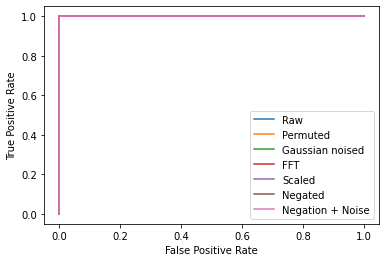

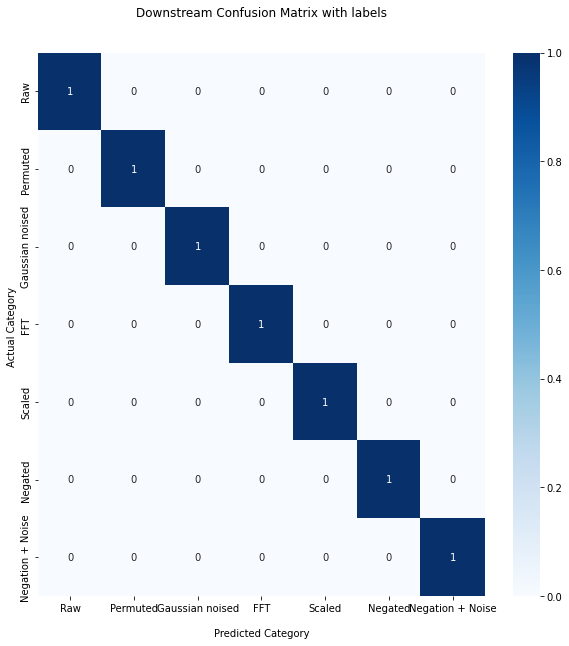

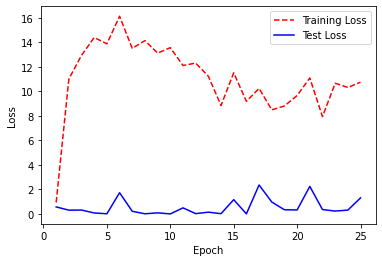

<Figure size 504x504 with 0 Axes>

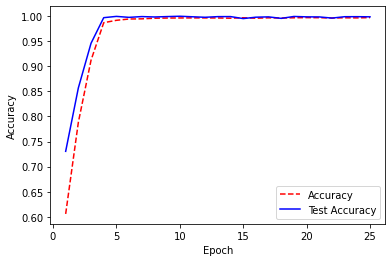

<Figure size 504x504 with 0 Axes>

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

model = Sequential()
#add model layers
model.add(Conv2D(100, kernel_size=(1,1), activation='relu', input_shape=(x_train.shape[1], 1, 1)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='softmax'))


sgd = SGD(learning_rate=0.001)
rms = RMSprop(learning_rate=0.001)
adam = Adam(learning_rate=0.001, epsilon=0.1)
model.compile(optimizer=rms,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#model.summary()
#from keras.utils.vis_utils import plot_model
#plot_model(model, show_shapes=True, show_layer_names=True)


history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=25)

test_labels = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)
Labels = ['Raw','Permuted', 'Gaussian noised', 'FFT', 'Scaled', 'Negated', 'Negation + Noise']

printConfusionMatrix(test_labels, y_pred, Labels, show=True)

def plot_graph(x, y, z, x_label, y_label, legends, figsize=(7,7)):
  plt.plot(z, x, 'r--')
  plt.plot(z, y, 'b-')
  plt.legend(legends)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.figure(figsize=figsize)
  plt.show()

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Get training and test loss histories
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

plot_graph(training_loss, test_loss, epoch_count, 'Epoch', 'Loss', ['Training Loss', 'Test Loss'])
plot_graph(accuracy, val_accuracy, epoch_count, 'Epoch', 'Accuracy', ['Accuracy', 'Test Accuracy'])

In [ ]:
data_loading_dir = os.path.join(root_dir, "18 participants/AX3/TransformedData" + str(experience))
save_file = os.path.join(data_loading_dir, "Model.pkl")

model.save(save_file)

Finding best optimiser

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

def plot_graph(x, y, z, x_label, y_label, legends, figsize=(7,7)):
  plt.plot(z, x, 'r--')
  plt.plot(z, y, 'b-')
  plt.legend(legends)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.figure(figsize=figsize)
  plt.show();

def run_CNN_Model(opt, x_train, y_train, x_test, y_test, epochs=5):
  performances = []
  accuracies = []
  lrs = []

  for i in range(5):
    lr = (10 ** i) / 100000
    lrs.append(lr)

    optimizer = SGD(learning_rate=lr)

    if opt == "rms":
      optimizer = RMSprop(learning_rate=lr)
    elif opt == "adam":
      optimizer = Adam(learning_rate=lr)

    #create model
    model = Sequential()
    #add model layers
    model.add(Conv2D(11, kernel_size=(1,1), activation='relu', input_shape=(x_train.shape[1],1,1)))
    model.add(Flatten())
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    #print(model.summary())

    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

    test_labels = np.argmax(y_test, axis=1)
    y_pred = np.argmax(model.predict(x_test), axis=1)
    Labels = ['Raw','Permuted', 'Noised', 'FFT']

    performance, accuracy = printConfusionMatrix(test_labels, y_pred, Labels, show=False)
    performances.append(performance)
    accuracies.append(accuracy)

    # Get training and test loss histories
    #training_loss = history.history['loss']
    #test_loss = history.history['val_loss']

    # Get training and test loss histories
    #accuracy = history.history['accuracy']
    #val_accuracy = history.history['val_accuracy']

    # Create count of the number of epochs
    #epoch_count = range(1, len(training_loss) + 1)

    #plot_graph(training_loss, test_loss, epoch_count, 'Epoch', 'Loss', ['Training Loss', 'Test Loss'])
    #plot_graph(accuracy, val_accuracy, epoch_count, 'Epoch', 'Accuracy', ['Accuracy', 'Test Accuracy'])
  return performances, accuracies, lrs
sgd_performances, sgd_accuracies, sgd_lrs = run_CNN_Model("sgd", x_train, y_train, x_test, y_test)
adam_performances, adam_accuracies, adam_lrs = run_CNN_Model("adam", x_train, y_train, x_test, y_test)
rms_performances, rms_accuracies, rms_lrs = run_CNN_Model("rms", x_train, y_train, x_test, y_test)


Epoch 1/5
57981/57981 [==============================] - 108s 2ms/step - loss: 9.2095 - accuracy: 0.6826 - val_loss: 0.8226 - val_accuracy: 0.7220
Epoch 2/5
57981/57981 [==============================] - 103s 2ms/step - loss: 0.8074 - accuracy: 0.7357 - val_loss: 0.7697 - val_accuracy: 0.7486
Epoch 3/5
57981/57981 [==============================] - 102s 2ms/step - loss: 0.7449 - accuracy: 0.7476 - val_loss: 0.7163 - val_accuracy: 0.7486
Epoch 4/5
57981/57981 [==============================] - 103s 2ms/step - loss: 0.6876 - accuracy: 0.7478 - val_loss: 0.6778 - val_accuracy: 0.7467
Epoch 5/5
57981/57981 [==============================] - 102s 2ms/step - loss: 0.6564 - accuracy: 0.7483 - val_loss: 0.6495 - val_accuracy: 0.7480
[[51538     0     0     0]
 [    0 51534     0     4]
 [51538     0     0     0]
 [  399    12     1 51126]]
Epoch 1/5
57981/57981 [==============================] - 103s 2ms/step - loss: 0.8712 - accuracy: 0.6475 - val_loss: 0.5462 - val_accuracy: 0.8951
Epoch 2/5

Finding optimal batch size and learning rate

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

def run_CNN_Model(opt, x_train, y_train, x_test, y_test, epochs=5):
  batch_size_performances = []
  batch_size_accuracies = []
  batch_sizes = [1, 20, 50, 100, 1000, 10000]
  lrs = []
  for batch_size in batch_sizes:
    performances = []
    accuracies = []
    lrs = []
    for i in range(5):
      lr = (10 ** i) / 100000
      lrs.append(lr)

      optimizer = Adam(learning_rate=lr)
      if opt == "rms":
        optimizer = RMSprop(learning_rate=lr)

      #create model
      model = Sequential()
      #add model layers
      model.add(Conv2D(8, kernel_size=(1,1), activation='relu', input_shape=(x_train.shape[1],1,1)))
      model.add(Flatten())
      model.add(Dense(6, activation='relu'))
      model.add(Dense(4, activation='softmax'))
      #print(model.summary())

      model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

      history = model.fit(x_train, y_train, 
                          validation_data=(x_test, y_test), 
                          batch_size=batch_size, 
                          epochs=epochs)

      test_labels = np.argmax(y_test, axis=1)
      y_pred = np.argmax(model.predict(x_test), axis=1)
      Labels = ['Raw','Permuted', 'Noised', 'FFT']

      performance, accuracy = printConfusionMatrix(test_labels, y_pred, Labels, show=False)
      performances.append(performance)
      accuracies.append(accuracy)
    batch_size_performances.append(np.array(performances))
    batch_size_accuracies.append(np.array(accuracies))
  return batch_size_performances, batch_size_accuracies, batch_sizes, lrs

n = x_train.shape[0]

randIdx_train = get_n_rand_nums(0, n, 10000)
randIdx_test = get_n_rand_nums(0, x_test.shape[0], 1000)

_ ,  x_train_test = separateArr(x_train, randIdx_train)
_ , y_train_test = separateArr(y_train, randIdx_train)
_ ,x_test_test = separateArr(x_test, randIdx_test)
_ , y_test_test = separateArr(y_test, randIdx_test)

#batch_size_performances_adam, batch_size_accuracies_adam, batch_sizes, lrs = run_CNN_Model("adam", x_train_test, y_train_test, x_test_test, y_test_test)
batch_size_performances_rms, batch_size_accuracies_rms, batch_sizes, lrs = run_CNN_Model("rms", x_train_test, y_train_test, x_test_test, y_test_test)

(1855368, 8, 1, 1)
(1855368, 4)
(206152, 8, 1, 1)
(206152, 4)
Epoch 1/5
10000/10000 [==============================] - 18s 2ms/step - loss: 13.7915 - accuracy: 0.3313 - val_loss: 9.8345 - val_accuracy: 0.4170
Epoch 2/5
10000/10000 [==============================] - 17s 2ms/step - loss: 5.8310 - accuracy: 0.4388 - val_loss: 6.3356 - val_accuracy: 0.5760
Epoch 3/5
10000/10000 [==============================] - 18s 2ms/step - loss: 3.7583 - accuracy: 0.5375 - val_loss: 5.3019 - val_accuracy: 0.5850
Epoch 4/5
10000/10000 [==============================] - 20s 2ms/step - loss: 2.5651 - accuracy: 0.5504 - val_loss: 4.4881 - val_accuracy: 0.5960
Epoch 5/5
10000/10000 [==============================] - 18s 2ms/step - loss: 1.9187 - accuracy: 0.5674 - val_loss: 4.5680 - val_accuracy: 0.6200
[[161   0  72  21]
 [  5   9  35 198]
 [  7   0 227  11]
 [  0   0  31 223]]
Epoch 1/5
10000/10000 [==============================] - 18s 2ms/step - loss: 146.3061 - accuracy: 0.6650 - val_loss: 1.0080 - val

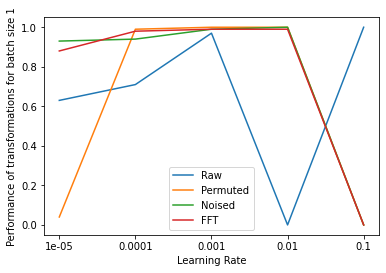

<Figure size 504x504 with 0 Axes>

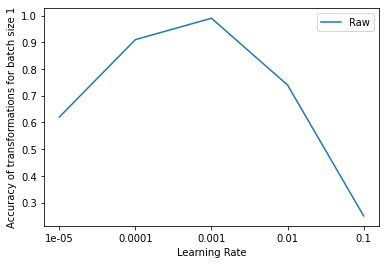

<Figure size 504x504 with 0 Axes>

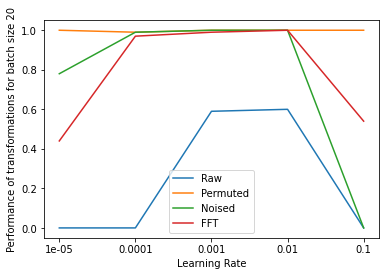

<Figure size 504x504 with 0 Axes>

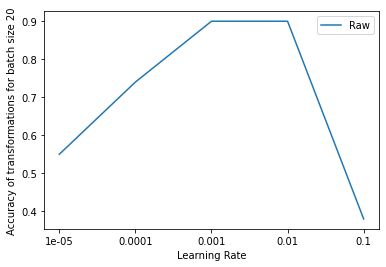

<Figure size 504x504 with 0 Axes>

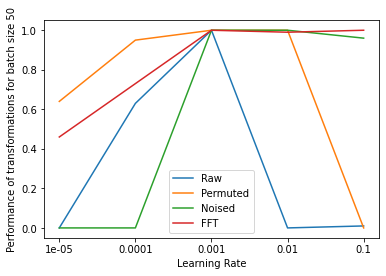

<Figure size 504x504 with 0 Axes>

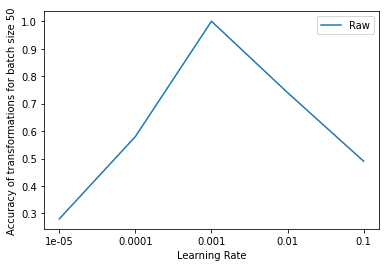

<Figure size 504x504 with 0 Axes>

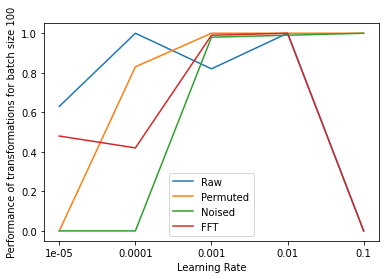

<Figure size 504x504 with 0 Axes>

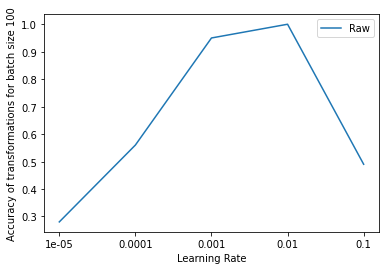

<Figure size 504x504 with 0 Axes>

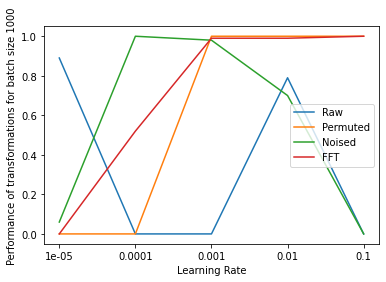

<Figure size 504x504 with 0 Axes>

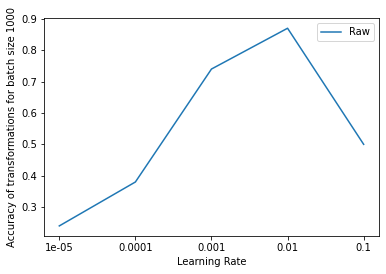

<Figure size 504x504 with 0 Axes>

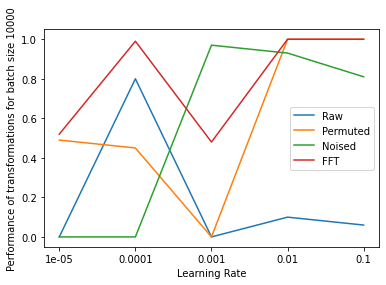

<Figure size 504x504 with 0 Axes>

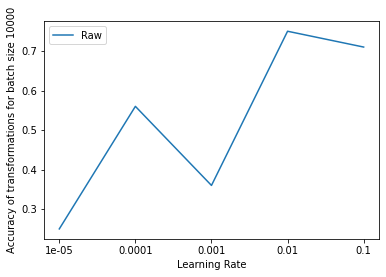

<Figure size 504x504 with 0 Axes>

In [ ]:
def plot_graph(x, y, x_label, y_label, legends, figsize=(7,7)):
  if len(y.shape) == 1:
    plt.plot(range(len(x)), y, 'C0')
  else:
    for i in range(y.shape[1]):
      plt.plot(range(len(x)), y[:, i], 'C'+str(i))
  ax = plt.gca()
  ax.xaxis.set_ticks(range(len(x)))
  ax.xaxis.set_ticklabels(x)
  plt.legend(legends)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.figure(figsize=figsize)
  plt.show()

#bs_per_adam = np.array(batch_size_performances_adam)
#bs_ac_adam = np.array(batch_size_accuracies_adam)

bs_per_rms = np.array(batch_size_performances_rms)
bs_ac_rms = np.array(batch_size_accuracies_rms)

#print(bs_per_adam.shape)
#print(bs_ac_adam.shape)

#print(bs_per_adam)
#print(bs_ac_adam)

for i in range(len(batch_sizes)):
  batch_size = batch_sizes[i]

  x_label = "Learning Rate"
  y_label = "Performance of transformations for batch size " + str(batch_size)
  legends = ['Raw','Permuted', 'Noised', 'FFT']
  plot_graph(lrs, bs_per_rms[i], x_label, y_label, legends)

  y_label = "Accuracy of transformations for batch size " + str(batch_size)
  plot_graph(lrs, bs_ac_rms[i], x_label, y_label, legends)


Extraxting the last hidden layer

In [ ]:
from keras import backend as K
data_loading_dir = os.path.join(root_dir, "18 participants/AX3/TransformedData" + str(experience))
load_file = os.path.join(data_loading_dir, "Model.pkl")
save_file = os.path.join(data_loading_dir, "Features.pkl")

model = keras.models.load_model(load_file)

def reshapeDataset(orig_dataset):
  dataset = np.array(orig_dataset)
  dataset = dataset.reshape((dataset.shape[0], dataset.shape[1], 1, 1))
  return dataset

def InsertMatrixIntoDataframe(dataframe, array):
  for i in range(array.shape[1]):
    arr = []
    for j in range(array.shape[0]):
      arr.append(array[j][i])
    dataframe[str(i)] = np.array(arr)
  print(dataframe.head(1))
  return dataframe

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])

split_point = 5000

dataset = reshapeDataset(raw_dataset[split_point:])
layer_output = get_3rd_layer_output([dataset])[0]

dataset = reshapeDataset(permuted_dataset[split_point:])
new_layer_output = get_3rd_layer_output([dataset])[0]
layer_output = np.append(layer_output, new_layer_output, axis=1)

dataset = reshapeDataset(noised_dataset[split_point:])
new_layer_output = get_3rd_layer_output([dataset])[0]
layer_output = np.append(layer_output, new_layer_output, axis=1)

dataset = reshapeDataset(fft_dataset[split_point:])
new_layer_output = get_3rd_layer_output([dataset])[0]
layer_output = np.append(layer_output, new_layer_output, axis=1)

dataset = reshapeDataset(scaled_dataset[split_point:])
new_layer_output = get_3rd_layer_output([dataset])[0]
layer_output = np.append(layer_output, new_layer_output, axis=1)

dataset = reshapeDataset(negated_dataset[split_point:])
new_layer_output = get_3rd_layer_output([dataset])[0]
layer_output = np.append(layer_output, new_layer_output, axis=1)

dataset = reshapeDataset(negation_plus_noise_dataset[split_point:])
new_layer_output = get_3rd_layer_output([dataset])[0]
layer_output = np.append(layer_output, new_layer_output, axis=1)

merged_features = DataFrame({'Label': orig_dataset['Label'][split_point:]})

merged_features = InsertMatrixIntoDataframe(merged_features, layer_output)

print(merged_features.shape)
merged_features.to_pickle(save_file)

                    Label    0    1    2    3    4    5    6    7    8  ...  \
5000  2020-02-05 01:16:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

       60   61   62   63   64   65   66   67   68   69  
5000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 71 columns]
(24620, 71)


Result helper methods

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(x_test), axis=1)

cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
#cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(cf_matrix)
#plot_confusion_matrix(conf_mat=cf_matrix, show_normed=True, figsize=(7,7))

fig, siz = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=siz)

ax.set_title('Transformation Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Transformation Category')
ax.set_ylabel('Actual Transformation Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Raw','Permuted', 'Noised', 'FFT'])
ax.yaxis.set_ticklabels(['Raw','Permuted', 'Noised', 'FFT'])

## Display the visualization of the Confusion Matrix.
plt.show()

NameError: ignored

In [7]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
from sklearn import metrics

#printConfusionMatrix(y_test, y_pred, Labels, show=True)

def printConfusionMatrix(test_labels, y_pred, Labels, show=True):
  cf_matrix = confusion_matrix(test_labels, y_pred)
  #cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  
  print(cf_matrix)

  precisions = []
  recalls = []
  f1_scores = []
  FPRs = []
  n = len(test_labels)

  total_vals = 0
  tps = 0
  for i in range(cf_matrix.shape[0]):
    sum_vals = cf_matrix[i].sum()
    sum_cols = cf_matrix[:, i].sum()

    total_vals += sum_vals
    tps += cf_matrix[i][i]
    recall = round(cf_matrix[i][i]/sum_vals, 2)
    recalls.append(recall)
    precision = round(cf_matrix[i][i]/sum_cols, 2)
    precisions.append(precision)
    f1_score = round(2 * precision * recall / (recall + precision), 2)
    f1_scores.append(f1_score)
    
    # ROC
    TN = n - sum_vals - sum_cols + cf_matrix[i][i]
    FP = sum_cols - cf_matrix[i][i]
    FPR = round(FP / (FP + TN), 2)
    FPRs.append(FPR)
    if show:
      print("Precision, Recall and F1 Score for " + Labels[i] + " are " + str(precision) + ", " + str(recall) + ", " + str(f1_score))
      plt.plot([0,FPR, 1],[0,recall,1])

  accuracy = round(tps/total_vals, 2)
  performance = round((np.array(f1_scores).sum()+np.array(recalls).sum()+np.array(precisions).sum())/(3*len(Labels)), 2)

  cf_mat = np.zeros((cf_matrix.shape[0], cf_matrix.shape[0]))
  print(cf_mat.shape)
  for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[0]):
      cols_sum = cf_matrix[:,j].sum()
      if (cf_matrix[i][j] == 0):
        cf_mat[i][j] = 0
      else:
        cf_mat[i][j] = round(cf_matrix[i][j]/cols_sum, 2)

  if show:
    print("Accuracy is " + str(accuracy))
    print("Performance is " + str(performance))
    #plot_confusion_matrix(conf_mat=cf_matrix, show_normed=True, figsize=(7,7))

    #create ROC curve
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(Labels)
    plt.show()

    fig, siz = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', ax=siz)


    ax.set_title('Downstream Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ');

    ## Ticket labels - List must be in alphabetical order

    ax.xaxis.set_ticklabels(Labels)
    ax.yaxis.set_ticklabels(Labels)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

  return precisions, accuracy

def get_n_rand_nums(start, end, totalNums):
  randIdx = random.sample(range(start, end), totalNums)
  randIdx.sort()
  return randIdx

# divides up the array to two arrays using the ids array
def separateArr(arr, ids):
  ids_id = 0
  part_1 = []
  part_2 = []

  print(arr.shape)

  for i in range(arr.shape[0]):
    row = arr[i]
    if ids_id < len(ids) and i == ids[ids_id]:
      part_2.append(row)
      ids_id += 1
    else:
      part_1.append(row)

  return np.array(part_1), np.array(part_2)